In [4]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import HowToBreakIntoTheField as t
%matplotlib inline
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
#import seaborn as sns


df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc
#get_description('Professional')

In [36]:
get_description('Professional')

'Which of the following best describes you?'

In [37]:
get_description('EmploymentStatus')

'Which of the following best describes your current employment status?'

In [5]:
sum(df['Professional'].isnull())  # 0 missing values
sum(df['EmploymentStatus'].isnull())  # 0 missing values

Text(0.5,1,"Developer's Type")

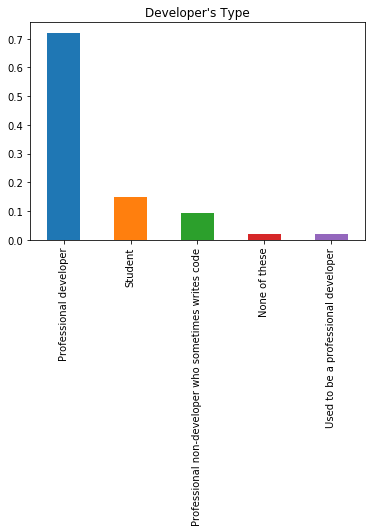

In [40]:
DP = df.Professional.value_counts()
ttl=df.shape[0]

(dp/ttl).plot(kind="bar") 
plt.title("Developer's Type")

Text(0.5,1,'What kind of employment status are you?')

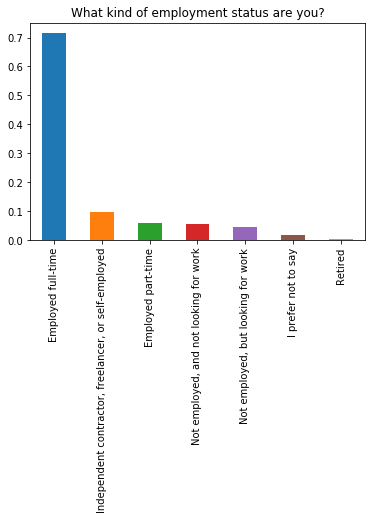

In [11]:
de = df.EmploymentStatus.value_counts()
ttl=df.shape[0]

(de/ttl).plot(kind="bar") 
plt.title("Developer's Employment Status")

In [43]:
job_sol_1 = {'The proportion of missing values in the Professional and EmploymentStatus column: 0',
             'According to Professional, which group has the highest stackoverflow usage: Professional developer',
             'According to EmploymentStatus, which group has the highest stackoverflow usage: Employed full-time', 
             'In general, are Professional Dev Resourses Obtained In Stackoverflow? : Yes'
             }
print(job_sol_1) 

{'In general, are Professional Dev Resourses Obtained In Stackoverflow? : Yes', 'According to EmploymentStatus, which group has the highest stackoverflow usage: Employed full-time', 'According to Professional, which group has the highest stackoverflow usage: Professional developer', 'The proportion of missing values in the Professional and EmploymentStatus column: 0'}


In [44]:
get_description('StackOverflowSatisfaction')

'Stack Overflow satisfaction'

In [45]:
get_description('SelfTaughtTypes')

"You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so."

In [11]:
df['StackOverflowSatisfaction'].isnull().mean()#0.30
df['SelfTaughtTypes'].isnull().mean()# missing rate: 0.47

0.46743796461103548

In [16]:
df.SelfTaughtTypes.value_counts()

Official documentation; Trade book; Stack Overflow Q&A                                                                                                                                     437
Official documentation; Stack Overflow Q&A                                                                                                                                                 391
Official documentation; Stack Overflow Q&A; Non-Stack online communities; Built-in help                                                                                                    378
Official documentation; Stack Overflow Q&A; Built-in help                                                                                                                                  373
Official documentation; Trade book; Stack Overflow Q&A; Built-in help                                                                                                                      321
Official documentation; Trade book; Stack Ove

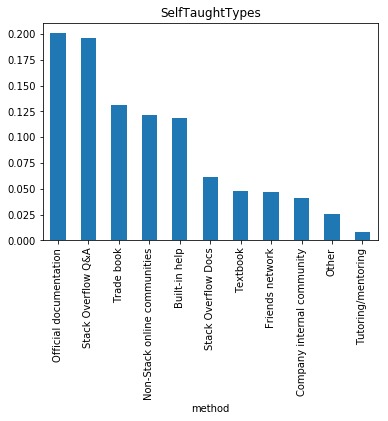

In [8]:
possible_vals = ["Official documentation", "Trade book", 
                 "Stack Overflow Q&A", "Non-Stack online communities", "Built-in help",
                 "Stack Overflow Docs", "Textbook", "Friends network",
                 "Tutoring/mentoring", "Company internal community", "Other"]

def clean_and_plot(df, title='SelfTaughtTypes', plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study = df['SelfTaughtTypes'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'SelfTaughtTypes': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

In [5]:
sub = df[['StackOverflowSatisfaction','SelfTaughtTypes']]
sub_rm = sub.dropna(subset=['StackOverflowSatisfaction','SelfTaughtTypes'], axis=0)
# dataframe with rows for nan satisfaction or SelfTaughtTypes removed
sub_rm.head()

,StackOverflowSatisfaction,SelfTaughtTypes
1,8.0,Official documentation; Stack Overflow Q&A; Other
2,8.0,Official documentation; Trade book; Textbook; ...
5,6.0,Official documentation; Stack Overflow Q&A; No...
6,8.0,Official documentation; Trade book; Textbook; ...
7,7.0,Official documentation; Trade book; Stack Over...


In [24]:
df.StackOverflowSatisfaction.value_counts()

8.0     3916
9.0     3459
10.0    3139
7.0     1858
6.0      588
5.0      301
4.0       71
3.0       58
2.0       34
1.0       16
0.0       12
Name: StackOverflowSatisfaction, dtype: int64

In [6]:
def highstf(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the StackOverflowSatisfaction column
    
    OUTPUT
        return 1 if the string is in ("9.0", "10.0")
        return 0 otherwise
    
    '''
    if formal_ed_str in (9.0,10.0): 
        return 1
    else:
        return 0
sub_rm['Satisfy'] = sub_rm['StackOverflowSatisfaction'].apply(highstf) 
sub_rm

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,StackOverflowSatisfaction,SelfTaughtTypes,Satisfy
1,8.0,Official documentation; Stack Overflow Q&A; Other,0
2,8.0,Official documentation; Trade book; Textbook; ...,0
5,6.0,Official documentation; Stack Overflow Q&A; No...,0
6,8.0,Official documentation; Trade book; Textbook; ...,0
7,7.0,Official documentation; Trade book; Stack Over...,0
9,9.0,Official documentation; Trade book; Non-Stack ...,1
10,10.0,Official documentation; Trade book; Stack Over...,1
13,10.0,Official documentation; Trade book; Stack Over...,1
16,7.0,Official documentation; Trade book; Textbook; ...,0
17,8.0,Official documentation; Stack Overflow Q&A; Other,0


In [9]:
Satify_high = sub_rm[sub_rm['Satisfy'] == 1] # Subset only those with HigherSatisfication of 1
Satify_nhigh = sub_rm[sub_rm['Satisfy'] == 0] # Subset only those without HigherSatisfication of 0

Satify_high_perc = clean_and_plot(Satify_high, plot=False)
Satify_nhigh_perc = clean_and_plot(Satify_nhigh, plot=False)

comp_df = pd.merge(Satify_high_perc, Satify_nhigh_perc, left_index=True, right_index=True)#'
comp_df.columns = ['Satify_high_perc', 'Satify_nothigh_perc']
comp_df['Diff_satisfication'] = comp_df['Satify_high_perc'] - comp_df['Satify_nothigh_perc']
comp_df.style.bar(subset=['Diff_satisfication'], align='mid', color=['#d65f5f', '#5fba7d'])

,Satify_high_perc,Satify_nothigh_perc,Diff_satisfication
method,,,
Stack Overflow Q&A,0.207978,0.187098,0.0208795
Official documentation,0.201197,0.204055,-0.00285754
Trade book,0.131112,0.131174,-6.23671e-05
Non-Stack online communities,0.117445,0.124487,-0.00704206
Built-in help,0.113683,0.125224,-0.0115405
Stack Overflow Docs,0.0651057,0.0546077,0.010498
Friends network,0.0461408,0.0486045,-0.00246372
Textbook,0.0441807,0.0495524,-0.00537165
Company internal community,0.0398898,0.0394945,0.000395342


In [ ]:
job_sol_2 = {'The proportion of missing values in the StackOverflowSatisfaction and SelfTaughtTypes column: 0.3 and 0.47',
             'According to SelfTaughtTypes, which groups have the high satisfaction: Stack Overflow Q&A and Stack Overflow Docs',
             'In general, What Self-taught Type can Get Most Help from StackOver? : Referring more Stack Overflow Q&A and Stack Overflow Docs' '
             }
print(job_sol_2) 

In [12]:
sub1 = df[['HaveWorkedLanguage','WantWorkLanguage']]
sub2 = df[['HaveWorkedFramework','WantWorkFramework']]
sub3 = df[['HaveWorkedDatabase','WantWorkDatabase']]
sub4 = df[['HaveWorkedpossible_vals3 = ['Cassandra','MongoDB','Redis','SQL Server','MySQL','PostgreSQL','Oracle','SQLite']

def clean_and_plot_sub3(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedDatabase'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedDatabase': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals3)
    
    study2 = df['WantWorkDatabase'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkDatabase': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals3)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Database');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Database');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df','WantWorkPlatform']]
sub1_rm = sub1.dropna(subset=['HaveWorkedLanguage','WantWorkLanguage']) # remove missing value
sub2_rm = sub2.dropna(subset=['HaveWorkedFramework','WantWorkFramework'])
sub3_rm = sub3.dropna(subset=['HaveWorkedDatabase','WantWorkDatabase'])
sub4_rm = sub4.dropna(subset=['HaveWorkedPlatform','WantWorkPlatform'])

In [21]:
possible_vals1 = ['JavaScript','Python','Ruby','SQL','C','C++','TypeScript',
                 'Haskell','Elixir','PHP','Perl','Assembly','VB.NET','Groovy',
                 'Go','Julia','VB.NET','Smalltalk','Objective-C','Lua','R','Matlab',
                 'Visual Basic 6','Rust','Swift','CoffeeScript','F#','Other']

def clean_and_plot_sub1(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedLanguage'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedLanguage': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals1)
    
    study2 = df['WantWorkLanguage'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkLanguage': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals1)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Language');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Language');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df
    
#props_df = clean_and_plot(ndf_rm1)

In [16]:
possible_vals2 = ['AngularJS','Hadoop','Node.JS','React','Spark','Cordova','Xamarin','Firebase','.NET Core']

def clean_and_plot_sub2(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedFramework'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedFramework': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals2)
    
    study2 = df['WantWorkFramework'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkFramework': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals2)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Framework');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Framework');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df

In [18]:
possible_vals3 = ['Cassandra','MongoDB','Redis','SQL Server','MySQL','PostgreSQL','Oracle','SQLite']

def clean_and_plot_sub3(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedDatabase'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedDatabase': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals3)
    
    study2 = df['WantWorkDatabase'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkDatabase': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals3)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Database');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Database');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df

In [26]:
possible_vals4 = ['Android','iOS','Windows Phone','Windows Desktop','Linux Desktop','Mac OS','Amazon Web Services (AWS)','Some other cloud platform (e.g. Google App Engine, Bluemix, Predix, etc.)']

def clean_and_plot_sub4(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedPlatform'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedPlatform': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals4)
    
    study2 = df['WantWorkPlatform'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkPlatform': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals4)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Platform');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Platform');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df

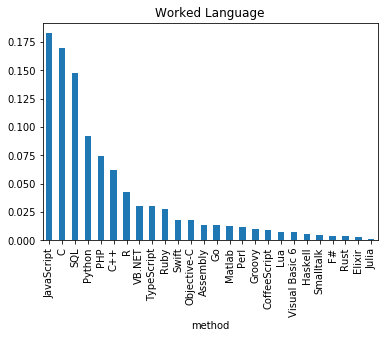

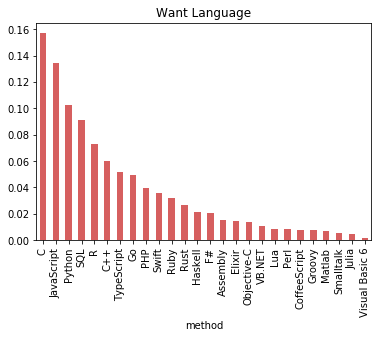

(                   count
 method                  
 JavaScript      0.182871
 C               0.169531
 SQL             0.147289
 Python          0.092314
 PHP             0.074179
 C++             0.061930
 R               0.042561
 VB.NET          0.030526
 TypeScript      0.029956
 Ruby            0.027725
 Swift           0.018064
 Objective-C     0.017708
 Assembly        0.013079
 Go              0.013055
 Matlab          0.012367
 Perl            0.011892
 Groovy          0.009661
 CoffeeScript    0.009376
 Lua             0.007548
 Visual Basic 6  0.006836
 Haskell         0.005388
 Smalltalk       0.004391
 F#              0.004059
 Rust            0.003679
 Elixir          0.002943
 Julia           0.001068,                    count
 method                  
 C               0.157118
 JavaScript      0.134785
 Python          0.102649
 SQL             0.091275
 R               0.072872
 C++             0.059925
 TypeScript      0.051741
 Go              0.049776
 PHP        

In [22]:
clean_and_plot_sub1(sub1_rm)

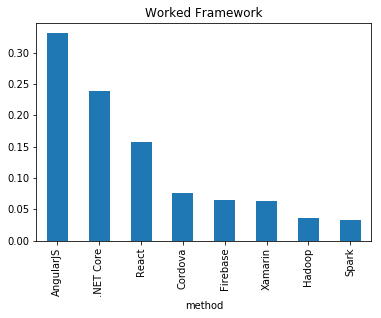

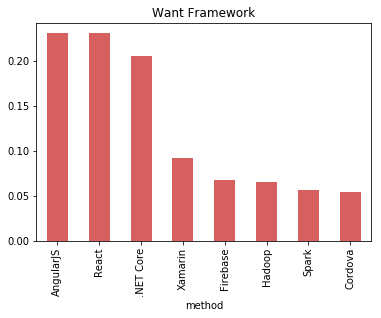

(              count
 method             
 AngularJS  0.330814
 .NET Core  0.239517
 React      0.157850
 Cordova    0.076060
 Firebase   0.064725
 Xamarin    0.062774
 Hadoop     0.035471
 Spark      0.032789,               count
 method             
 AngularJS  0.230456
 React      0.230456
 .NET Core  0.205107
 Xamarin    0.091868
 Firebase   0.066889
 Hadoop     0.065686
 Spark      0.055787
 Cordova    0.053752)

In [23]:
clean_and_plot_sub2(sub2_rm)

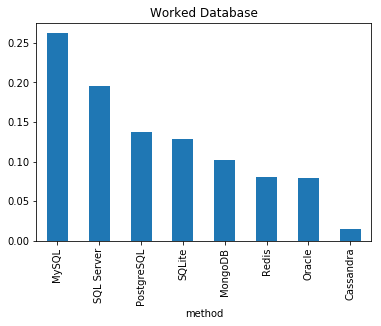

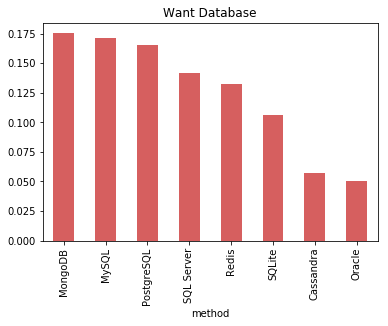

(               count
 method              
 MySQL       0.262018
 SQL Server  0.195587
 PostgreSQL  0.137727
 SQLite      0.128634
 MongoDB     0.101703
 Redis       0.080273
 Oracle      0.078883
 Cassandra   0.015174,                count
 method              
 MongoDB     0.175316
 MySQL       0.171613
 PostgreSQL  0.165330
 SQL Server  0.141711
 Redis       0.132230
 SQLite      0.106648
 Cassandra   0.057111
 Oracle      0.050042)

In [24]:
clean_and_plot_sub3(sub3_rm)

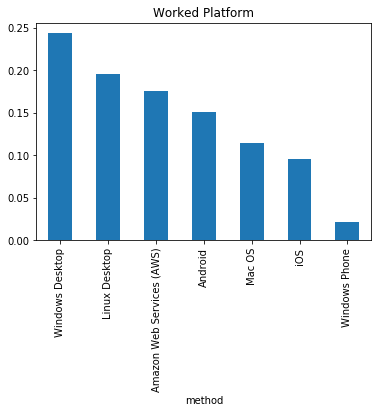

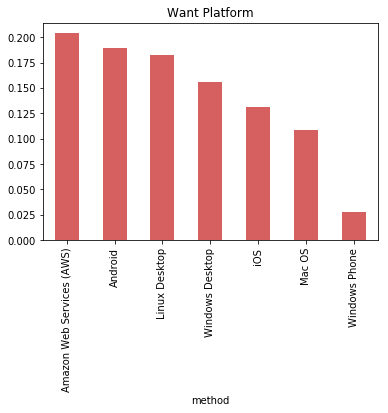

(                              count
 method                             
 Windows Desktop            0.243949
 Linux Desktop              0.196078
 Amazon Web Services (AWS)  0.175456
 Android                    0.151454
 Mac OS                     0.115010
 iOS                        0.096078
 Windows Phone              0.021974,                               count
 method                             
 Amazon Web Services (AWS)  0.204158
 Android                    0.189455
 Linux Desktop              0.182465
 Windows Desktop            0.155890
 iOS                        0.131365
 Mac OS                     0.109009
 Windows Phone              0.027659)

In [27]:
clean_and_plot_sub4(sub4_rm)

In [28]:
job_sol_3 = {'The top 3 programming Languages change from worked to wanted: Javascript>C>SQL -> C>Javascript>Python',
             'The top 3 Frameworks: AngularJS,React,.NET Core',
             'The top 3 Databases change from worked to wanted: MySQL > SQL Server > PostgreSQL -> MongoDB > MySQL > PostgreSQL',
             'The top 3 Platforms change from worked to wanted: Windows Desktop>Linux Desktop> AWS -> AWS>Android>Linux Desktop.'
             }
print(job_sol_3) 

{'The top 3 Databases change from worked to wanted: MySQL > SQL Server > PostgreSQL -> MongoDB > MySQL > PostgreSQL', 'The top 3 programming Languages change from worked to wanted: Javascript>C>SQL -> C>Javascript>Python', 'The top 3 Frameworks: AngularJS,React,.NET Core', 'The top 3 Platforms change from worked to wanted: Windows Desktop>Linux Desktop> AWS -> AWS>Android>Linux Desktop.'}
